In [1]:
import os, sys, warnings
import,, matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as,,, pd
import numpy as np
warnings.filterwarnings('ignore')
plt.style.use('/Users/b324115/Library/CloudStorage/Box-Box/critical_phenomena_saxs/allisons_data/presentation.mplstyle')

from rdkit import Chem
from rdkit.Chem import Draw

from fragmentation import Groups


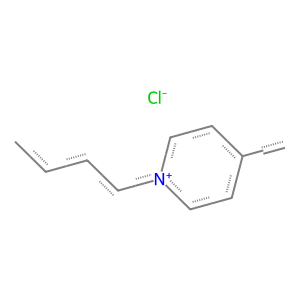

In [2]:
smiles = "CCCC[n+]1ccc(C)cc1.[Cl-]"
mol = Chem.MolFromSmarts(smiles)
Draw.MolToImage(mol)

In [3]:
groups = Groups(smiles)

In [4]:
groups.unifac_IL.to_num

{1: 2, 2: 3, 350: 1, 369: 1}

In [5]:
groups.unifac_IL.subgroups

{'CH3': 2, 'CH2': 3, '[Mpyr]': 1, '[CL]': 1}

In [8]:
groups.unifac_IL.q, groups.unifac_IL.r

(7.875699999999999, 7.315799999999999)

In [50]:
import csv

# Define the group names for Group i
group_j_names = [
    "[Im]", "[Py]", "[Pyr]", "[Pip]", "[Mmor]", "[Quin]", "[CH3N]", "[CH3P]", "[CH3S]",
    "[Dabco]", "[Quinc]", "[CL]", "[BR]", "[BF4]", "[PF6]", "[OAc]", "[C14H29Ac]",
    "[C16H33Ac]", "[TFA]", "[NO3]", "[CLO4]", "[Lac]", "[TOS]", "[HSO4]",
    "[CH3OC2H4SO4]", "[C2H5OC2H4SO4]", "[CH3SO4]", "[C2H5SO4]", "[C8H17SO4]",
    "[CH3SO3]", "[CF3SO3]", "[CH3(OC2H4)2SO4]", "[SCN]", "[N(CN)2]", "[C(CN)3]",
    "[B(CN)4]", "[DMP]", "[DEP]", "[DBP]", "[Tf2N]", "[FAP]", "[FSI]", "[BOB]",
    "[TDI]", "[NPF2]", "[(C16H34)PO2]", "[CH3PO3H]", "[C2H5PO3H]"
]

group_i_names = [
	'CH2', 'C=C', 'ACH', 'ACCH2', 'OH', 'CH3OH', 'H2O', 'CH2CO', 'CHO', 'CCOO', 'CH2O', '(C)3N', 'PYRIDINE', 'CCN', 'COOH', 'CCL', 'CCL2', 'CCL3', 'CCL4', 'ACCL', 'CNO2', 'C=-C', 'CY-CH2', 'CY-CH2O', 'ACS'
]

# Define the interaction matrix for Group i (replace '...' with the actual data)
interaction_matrix_i = [
    [-190.5, -272.9, -317.9, -167.6, 215.0, 132.0, 2.2, -511.7, -441.7, -240.7, -580.3, -487.0, -2072.8, -260.7, -331.8, -294.1, -466.8, -290.3, -346.1, 5485.4, -467.3, -700.9, -268.6, -490.0, -207.8],
    [-232.4, -55.5, -370.6, -205.3, 486.7, 313.5, 116.0, -490.7, -440.5, 3015.8, -327.0, 82.0, 1602.6, 1742.0, -22.5, -402.8, -573.5, -167.9, -336.0, 5070.0, -327.2, -587.7, -263.9, -488.3, -2.0],
    [89.9, 1143.6, -235.5, 179.5, 537.0, 660.0, 379.4, 57.8, -237.9, -338.4, -98.4, -43.6, -688.1, 490.3, -46.9, -208.1, 492.7, -161.7, -236.8, 7375.0, -209.5, -95.3, -12.9, 132.7, 254.9],
    [146.7, 3993.6, 1270.8, 1091.2, 670.8, 733.5, 513.4, -58.3, 16.1, -175.6, -98.1, -221.4, 1857.3, 582.5, 505.6, -212.1, -289.8, -210.6, -230.1, 837.6, 3.0, 544.5, 496.4, 372.5, 419.7],
    [166.5, -115.9, -173.2, 3640.1, 76.3, 371.2, 81.8, -43.1, -439.6, -170.3, 3889.7, -593.1, 7719.5, 184.7, 1105.1, 818.8, -326.4, -126.9, -76.1, 5657.1, -357.7, 905.1, -16.0, -40.5, 9710.5],
    [111.6, 1361.2, 708.3, 1748.3, 842.2, None, None, 160.1, -79.5, 552.1, 49.9, -95.4, None, None, 3095.2, -175.9, -333.3, -24.1, -185.5, 2635.3, -226.0, 411.5, 384.6, 494.9, None],
    [4341.0, 5072.9, 203.7, 3726.8, 1390.4, 566.7, 2323.4, -156.3, 1491.3, 2007.2, 3378.0, 3205.6, 1417.6, 178.7, 4935.4, 4224.0, 1657.6, 3170.6, 276.1, 4525.0, 3196.7, 3104.4, 5172.2, 2952.7, 2406.3],
    [4916.9, 74.4, -130.7, 3192.9, 304.9, 135.0, 81.5, -208.0, -287.6, -85.9, 2666.1, 3597.7, 985.2, 154.1, 502.5, -397.5, 2005.6, -206.1, -165.5, 3820.2, 3345.2, -263.5, 4332.8, -31.2, -66.0],
    [1964.0, 664.4, -86.0, 185.6, 291.5, None, None, 296.2, -61.2, 631.3, 435.4, None, None, None, None, None, None, None, None, None, 588.6, -148.3, 526.3, None, None],
    [597.5, 193.7, 66.0, -255.2, 396.5, None, None, -397.4, -186.7, -163.0, -309.9, None, None, None, None, None, None, None, None, None, 77.0, -179.3, 84.7, None, None],
    [-413.7, -146.9, -483.8, 35.7, 426.4, None, None, -431.8, -301.7, -436.8, -677.7, None, None, None, -126.6, -659.2, None, None, -543.7, 4818.5, -336.2, -682.6, -314.5, -346.6, None],
    [5662.3, 5215.2, 3246.4, 2924.6, -353.4, -453.5, -704.3, 2003.2, 4084.7, 2557.9, 5114.9, 3459.8, 1902.6, 1578.4, -146.9, 4144.9, 3747.7, 2638.2, 3669.0, 4967.9, -213.8, -582.5, 3677.8, 5577.8, 3692.1],
    [4218.4, 3273.1, 5059.1, 4304.2, -814.9, None, -322.3, 4590.0, -223.6, 680.7, 4231.9, 567.9, 642.7, -236.9, 1428.6, 4806.0, 72.6, -657.6, 99.4, 3392.0, -54.4, 4084.3, 4411.8, 3784.0, 2970.2],
    [110.2, -4.8, 244.0, 934.4, 271.2, -192.9, -319.1, -27.4, 864.3, 849.6, 654.3, -78.9, 2771.8, -311.4, 166.3, 114.8, 2193.3, 97.2, 4417.2, 4715.8, -185.0, -348.4, 2014.3, -123.1, 4836.7],
    [185.8, 293.2, 228.8, 18.4, 296.2, 464.3, 973.9, -58.2, -49.2, -288.0, 181.4, 3423.5, 4805.3, 4029.0, 2848.8, 81.2, 465.8, 4124.4, 398.2, 4952.2, 5751.1, 3546.9, 399.5, 6900.0, 3062.1],
    [-69.1, -165.5, -1.1, 77.9, -1122.9, -1089.2, -879.2, 134.2, 214.9, 149.2, -245.5, -734.0, 4151.7, 4497.8, -630.4, -379.6, 126.4, 622.4, -258.7, -652.7, -284.3, -417.1, -42.2, -41.3, -7.1],
    [-236.4, None, None, None, 434.2, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
    [-271.5, -329.0, -74.8, -151.6, 298.7, None, None, 23.7, 117.3, -137.8, -68.1, None, None, None, None, None, None, None, None, None, None, -326.9, -195.0, None, None],
    [739.7, -130.2, 3701.7, 11.8, -469.9, -741.8, -541.8, -52.9, 4920.2, -46.6, -275.9, -173.1, -1652.7, -168.6, -152.4, 606.8, 766.0, 731.7, 11.8, -255.1, -184.7, 173.1, 198.2, 1881.2, 107.6],
    [3333.8, -94.3, 4501.5, 4070.7, -440.3, -616.1, -571.6, 2313.1, 4774.5, 4692.3, 876.1, 386.7, 2073.0, 4301.4, -36.3, 3415.8, 1220.8, 4902.6, 5883.7, 3134.3, 156.3, 4733.6, 3621.0, 947.5, 3266.7],
    [-56.3, -365.4, 2643.7, 76.7, 78.4, -188.7, -374.4, -454.0, 3775.5, -316.6, 65.5, -363.8, 2287.1, -346.5, 240.0, 4004.5, 3776.8, 595.2, 108.7, 4974.6, -278.6, -272.2, 488.4, 4542.6, 458.5],
    [348.9, 66.1, -129.8, 1983.6, -1029.5, None, None, -36.2, 337.7, -271.7, -171.0, -356.9, None, None, -513.2, -295.7, -99.7, 446.3, -49.9, 4460.7, -468.8, 3444.7, 159.7, -123.0, None],
    [266.1, 162.3, 1029.8, 61.0, -257.4, -511.0, -406.9, 91.7, 508.2, 194.5, -126.3, 771.3, 2538.3, -74.4, 267.0, -55.1, -205.7, -123.2, 412.2, 4174.9, -215.2, 2849.9, 155.4, 285.0, 594.1],
    [-131.7, -41.7, 156.1, 428.1, -663.3, None, -660.0, 4914.3, 4627.2, -86.3, -72.2, -800.2, 1891.2, None, -177.4, -351.0, -464.4, -574.4, -209.1, -546.6, -270.0, -234.4, -3.2, 158.6, 25.0],
    [10.1, -9.3, 76.9, 201.2, -292.6, None, None, 20.1, 1181.5, -111.1, -243.4, None, None, None, None, None, None, None, None, None, -78.5, -112.9, 25.8, -79.6, None],
    [-151.8, -60.3, -38.5, -17.4, 2.3, None, None, -89.6, -38.2, -121.8, -301.2, None, None, None, None, None, None, None, None, None, None, -315.6, -123.1, None, None],
    [89.5, 104.5, 463.9, 4578.6, -248.4, 2783.1, -574.5, -51.2, 393.5, 138.3, -76.3, 3542.2, -354.0, -188.3, -264.4, 1513.6, -140.4, -173.5, 4977.3, 4483.8, -256.4, -197.4, 250.8, 3465.2, 5567.5],
    [4017.5, 421.8, 461.9, 567.2, -257.1, -354.4, -420.7, 576.5, 657.9, 9.7, -65.1, -482.2, 171.6, -92.4, 736.7, -24.9, -94.7, -358.2, 650.4, 262.0, -94.2, -60.0, 389.5, 60.8, 4622.1],
    [-38.4, -149.9, 124.0, 83.8, 552.6, None, -325.4, 512.3, 582.6, -171.8, 14.0, 45.6, 2641.0, -49.7, 634.1, -239.5, -190.8, -95.7, None, 311.9, -73.2, -176.9, -101.5, -0.4, 441.3],
    [102.2, 86.7, 372.4, 3455.3, -377.2, 2632.5, -637.9, 626.6, 5932.7, 15.7, 68.4, -1086.8, 1705.0, -226.7, 3204.3, -172.8, -241.0, -390.0, -35.6, -486.9, -205.3, -169.3, 187.1, 331.2, 63.1],
    [229.6, 229.1, 616.3, 581.6, 18.8, -69.3, -175.5, 224.2, 325.8, 57.7, 121.0, -376.9, 5455.2, -179.5, -58.9, 1507.2, -16.8, -191.7, 438.1, 6015.9, -158.1, 307.7, 169.6, -184.5, 2759.7],
    [229.0, 504.4, 84.6, 52.9, 201.2, None, None, 186.4, 546.4, 132.5, 38.6, None, None, None, None, None, None, None, None, None, 40.5, 88.0, 33.6, 48.9, None],
    [509.6, 5167.8, 4369.4, 4261.6, -250.9, -512.2, -625.7, 42.3, 3821.3, 298.8, 2285.7, 902.5, 767.2, -220.7, -321.4, 5403.1, 18.3, -334.5, 142.7, 1075.9, -29.5, 3421.2, 1316.8, 49.1, 5930.1],
    [78.0, -121.9, 32.3, 188.3, -321.0, -419.7, -704.1, -222.8, 102.8, -270.7, -104.5, -4.1, -918.8, -192.9, 3099.8, -190.9, -120.8, 24.1, 24.9, 5192.7, -287.5, 366.4, 34.4, -218.6, 139.4],
    [-36.5, -54.0, 866.1, 42.4, -27.2, -173.4, -224.0, -258.1, 527.1, 434.1, -88.7, -216.7, -984.6, -196.5, 262.2, -270.5, -165.4, -318.2, -126.9, 6183.3, -329.7, 183.1, -73.8, -291.1, -105.4],
    [-162.4, -66.2, -279.6, -53.0, 261.4, 102.2, -17.7, -157.6, -146.1, -333.2, -156.4, -117.5, -1039.7, -154.1, 294.8, -159.2, -149.2, 117.5, 159.3, 6065.9, -273.2, -10.7, -120.7, -268.5, 78.2],
    [125.2, -203.0, 188.7, 134.8, -1017.8, -389.1, -904.0, -131.4, 4156.4, 280.0, 67.5, 4156.4, 2469.4, -173.8, -220.2, -270.9, -336.5, 83.6, -133.3, -486.2, -234.2, -424.8, -32.1, -162.3, -18.7],
    [-223.4, -258.2, -189.5, -5.6, 399.9, 119.3, -765.6, -115.4, 858.1, -426.4, -148.2, 240.1, 6468.5, -237.1, -620.1, -449.2, -594.1, -448.0, -310.4, 6041.9, -373.1, -342.6, -266.2, -293.0, -87.0],
    [-93.8, 177.5, -151.6, -26.9, 144.4, None, None, -89.9, 147.6, -219.8, -343.3, None, None, None, None, None, None, None, None, None, -131.0, -273.7, -209.9, -179.8, None],
    [-3.1, -19.6, 125.3, -44.5, 493.0, 241.2, 319.0, -239.7, 1412.5, 91.3, -473.6, 1503.7, -778.4, -144.6, 295.7, -221.9, -306.8, 986.5, 357.2, 5181.4, -293.3, 1.7, -8.5, -152.2, 137.6],
    [19.6, -75.2, 82.6, -241.6, 1353.9, 957.4, 629.9, 565.5, 1885.8, -769.1, -575.1, 6021.5, -195.0, 400.9, 737.5, -315.7, -160.9, 500.8, -3.2, 5213.4, -9.8, -113.6, -90.7, 7410.0, -124.7],
    [263.3, 221.4, -82.2, 4330.1, 482.4, 525.4, -164.4, -257.2, 987.2, -402.0, -354.7, 87.8, 3379.4, 18.2, 221.4, -257.8, -278.1, 2775.6, 233.7, 5603.9, -191.8, -379.3, 36.1, -287.8, -65.3],
    [549.7, 504.0, 143.9, 229.7, 586.7, 218.9, -329.9, -4.4, 1144.2, 126.6, -51.3, 1251.3, -1112.9, 11.7, 159.7, -116.0, -80.0, 121.0, 362.4, 4733.0, -29.7, 3173.7, 524.7, -171.7, 652.2],
    [-7.7, -71.2, 121.3, -316.4, 350.9, 404.4, 84.8, -532.1, -400.4, 203.8, -128.4, -108.2, -420.9, -118.6, 289.8, -123.3, -197.9, 3005.4, 134.2, 5265.1, -90.3, -172.4, -109.6, -327.2, 6167.4],
    [-71.0, 111.9, -192.7, -89.9, 451.8, None, None, -434.4, -104.0, -567.8, -542.2, None, None, None, None, None, None, None, None, None, None, None, -185.0, None, None],
    [-281.8, -465.6, -408.6, -485.5, 95.9, None, None, -276.5, 410.7, -468.1, -559.2, None, None, None, None, None, None, None, None, None, -380.5, -561.7, -480.2, -480.2, None],
    [-193.3, -103.1, -3.9, 266.7, -885.7, None, None, 183.0, 3523.2, -21.4, -114.2, None, None, None, None, None, None, None, None, None, -93.2, -151.7, 1506.2, None, None],
    [85.2, -38.4, 40.5, 358.8, -978.4, None, None, -7.5, 583.0, -112.5, -198.0, None, None, None, None, None, None, None, None, None, None, 168.4, 24.8, None, None]
]


In [51]:
ip_matrix = np.array(interaction_matrix_i)

In [53]:
df_ip_row_col = pd.DataFrame(ip_matrix)
df_ip_row_col.columns = group_i_names
df_ip_row_col.index = group_j_names

df_ip

,CH2,C=C,ACH,ACCH2,OH,CH3OH,H2O,CH2CO,CHO,CCOO,...,CCL,CCL2,CCL3,CCL4,ACCL,CNO2,C=-C,CY-CH2,CY-CH2O,ACS
[Im],-190.5,-272.9,-317.9,-167.6,215.0,132.0,2.2,-511.7,-441.7,-240.7,...,-294.1,-466.8,-290.3,-346.1,5485.4,-467.3,-700.9,-268.6,-490.0,-207.8
[Py],-232.4,-55.5,-370.6,-205.3,486.7,313.5,116.0,-490.7,-440.5,3015.8,...,-402.8,-573.5,-167.9,-336.0,5070.0,-327.2,-587.7,-263.9,-488.3,-2.0
[Pyr],89.9,1143.6,-235.5,179.5,537.0,660.0,379.4,57.8,-237.9,-338.4,...,-208.1,492.7,-161.7,-236.8,7375.0,-209.5,-95.3,-12.9,132.7,254.9
[Pip],146.7,3993.6,1270.8,1091.2,670.8,733.5,513.4,-58.3,16.1,-175.6,...,-212.1,-289.8,-210.6,-230.1,837.6,3.0,544.5,496.4,372.5,419.7
[Mmor],166.5,-115.9,-173.2,3640.1,76.3,371.2,81.8,-43.1,-439.6,-170.3,...,818.8,-326.4,-126.9,-76.1,5657.1,-357.7,905.1,-16.0,-40.5,9710.5
[Quin],111.6,1361.2,708.3,1748.3,842.2,None,None,160.1,-79.5,552.1,...,-175.9,-333.3,-24.1,-185.5,2635.3,-226.0,411.5,384.6,494.9,None
[CH3N],4341.0,5072.9,203.7,3726.8,1390.4,566.7,2323.4,-156.3,1491.3,2007.2,...,4224.0,1657.6,3170.6,276.1,4525.0,3196.7,3104.4,5172.2,2952.7,2406.3
[CH3P],4916.9,74.4,-130.7,3192.9,304.9,135.0,81.5,-208.0,-287.6,-85.9,...,-397.5,2005.6,-206.1,-165.5,3820.2,3345.2,-263.5,4332.8,-31.2,-66.0
[CH3S],1964.0,664.4,-86.0,185.6,291.5,None,None,296.2,-61.2,631.3,...,None,None,None,None,None,588.6,-148.3,526.3,None,None
[Dabco],597.5,193.7,66.0,-255.2,396.5,None,None,-397.4,-186.7,-163.0,...,None,None,None,None,None,77.0,-179.3,84.7,None,None


In [71]:
interaction_matrix_ji = [
    [1050.9, 1370.3, 509.4, 4086.0, -90.9, 140.6, -29.4, 689.4, 23.0, -118.3, 6527.5, 43.0, -359.5, 6339.2, 330.5, 8.4, 67.7, 4042.8, 2878.8, 6076.1, 3589.2, 820.4, 1037.3, 8645.9, 178.3],
    [1342.0, 124.4, 899.0, 584.9, -185.3, -14.5, -61.6, 555.9, 354.2, -417.2, 48.9, -287.2, -511.6, -161.7, -175.5, 230.5, 512.7, 206.9, 1210.0, 4275.1, 260.8, 247.1, 682.4, 3566.3, -147.7],
    [396.4, -111.7, 1278.5, 125.3, -224.6, -45.6, -123.2, -89.8, -45.9, 3524.1, -3.7, -79.4, -458.5, -89.3, 20.7, 131.0, -265.2, 212.8, 3213.4, 90.0, 287.0, -263.7, 398.8, -36.5, -179.4],
    [188.8, -160.3, -303.1, -96.5, -255.6, -49.1, -167.5, 97.6, -338.0, 229.0, 174.4, 263.1, -297.5, -77.8, -134.6, 185.4, 212.4, 578.2, 1380.6, 3276.4, -26.9, -399.5, -63.5, -155.8, -255.1],
    [836.5, 2320.9, 4099.5, 124.2, -48.1, 433.5, 75.9, -93.9, 2519.7, 55.5, -217.6, 3118.7, -458.6, 183.3, -423.6, -68.0, 1533.8, 4633.8, 4259.1, 5064.6, 2737.4, -399.9, 1011.9, 194.2, -112.0],
    [-1.3, -190.8, -312.9, -189.4, -272.4, np.nan, np.nan, -109.0, 835.0, -378.2, 51.9, 1691.1, np.nan, np.nan, -348.6, 71.8, 380.4, 46.3, 3293.6, 812.0, 1076.5, -341.0, -148.9, -259.4, np.nan],
    [876.7, 5167.5, 4099.2, 4228.6, -333.1, -133.6, -153.8, 2643.6, -878.5, 4081.0, 4292.4, 2757.1, -378.2, 8301.5, -398.0, 160.0, 30.7, 155.0, 267.0, 5018.9, 146.7, 178.6, 6185.8, 317.5, -92.8],
    [-116.7, 7060.3, 4043.4, 3297.0, 3586.1, 2429.1, 837.4, 2758.3, 1330.1, 2222.2, 3418.9, 2821.8, -431.3, 5278.8, -440.1, 1908.8, -475.0, -18.9, 1980.0, 3502.0, -181.2, 3786.5, -203.9, 7232.5, 3900.4],
    [1986.2, 577.6, 2988.3, 2209.3, -179.3, np.nan, np.nan, 533.8, -119.7, 438.0, 824.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 840.6, -173.1, 510.9, np.nan, np.nan],
    [-799.8, -569.6, -717.8, 1250.7, -812.5, np.nan, np.nan, -765.1, -816.4, -892.2, -642.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, -423.2, -905.9, -617.8, np.nan, np.nan],
    [51.8, -121.8, 136.3, -241.0, -40.4, np.nan, np.nan, 8.5, 90.5, -132.3, -99.1, np.nan, np.nan, np.nan, 742.1, 7.8, np.nan, np.nan, 589.3, 3695.5, 81.1, 11.7, -136.1, 15.5, np.nan],
    [5067.4, 6486.2, 3763.9, 3620.6, -487.6, -596.7, -460.5, 2865.3, 4675.6, 3394.8, 4810.1, 3347.4, 6855.0, 286.4, 3214.2, 5445.6, 4524.7, -311.1, 4782.1, 5031.7, 5747.4, 3317.5, 4179.5, 6159.8, 6695.2],
    [686.0, 4692.6, 8394.3, 5729.6, 367.5, np.nan, -469.3, 4998.2, 1743.3, 1214.7, 5023.1, 22.8, 3851.6, 4130.4, -395.7, 330.4, 2696.7, 207.8, 2237.7, 3983.5, 4787.7, 6250.3, 4569.2, 4110.5, 5678.7],
    [1726.1, 729.7, 1298.4, 3281.2, 13.1, 259.0, 11.7, 1974.4, 1451.2, 8.7, 849.5, 345.8, 5879.8, 5320.3, -1.2, 5052.9, 3284.7, 456.2, 3719.3, 4432.2, 2062.1, 3704.2, 762.9, 3957.8, 6148.1],
    [186.1, 103.2, 133.8, 804.1, 325.3, 238.4, -301.6, 233.1, 151.3, 272.6, 88.7, -23.8, -294.6, -244.8, -58.2, 171.8, 21.1, -113.0, 216.9, 4219.9, -112.2, 181.4, 108.3, -5.8, -21.9],
    [978.2, 426.9, 3061.7, 2349.3, 3.2, 52.1, -136.2, 565.1, 535.9, 208.3, 442.2, -124.9, 3543.3, -144.0, -41.6, 748.7, -33.8, -258.3, 632.9, 5337.2, 595.2, 188.9, 906.5, 654.9, 6795.5],
    [-209.2, np.nan, np.nan, np.nan, 85.8, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [-138.5, -18.6, -94.7, -118.7, 409.4, np.nan, np.nan, 23.3, 242.0, -112.8, -219.7, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 150.3, -128.6, np.nan, np.nan],
    [125.3, 4913.4, 193.1, 3346.1, 16.7, 3946.9, -42.1, -27.9, 98.5, 1285.7, -10.0, -310.1, -235.8, 4262.9, -83.4, -21.0, 87.8, -160.0, 5424.0, 3920.2, 4379.2, 729.1, 477.7, -127.4, 4397.2],
    [812.4, -124.2, 5063.9, 4873.3, 399.3, 1360.7, -107.3, 3143.4, 4710.0, 4349.4, 1311.9, -163.4, 4239.6, -133.9, -36.0, 256.7, 535.5, -147.9, 508.4, 465.0, 387.5, 7091.9, 4302.9, 2626.1, 195.1],
    [3479.2, 3765.1, 164.3, 2282.5, 161.9, 3286.3, 158.1, 1223.7, 654.4, 855.7, 225.8, 14.5, 13.3, 4618.9, -67.3, 57.1, 33.1, 118.4, 6206.8, 4779.1, 799.9, 4524.0, 559.5, 34.0, 257.4],
    [14.5, 277.7, 2112.3, 864.5, 3391.2, np.nan, np.nan, 962.5, 3801.2, 216.1, 9388.5, -474.4, np.nan, np.nan, 2597.1, 1049.9, -52.1, -279.1, 661.0, 4061.8, 2808.7, -248.7, 169.3, 3703.3, np.nan],
    [109.4, 240.0, 14.1, 678.3, -91.6, 379.5, -175.7, 574.8, 312.3, -30.6, 451.4, -439.5, -214.7, 861.3, -256.9, 113.4, 374.5, 13.9, 45.7, -240.7, 4047.7, -20.4, 185.0, 141.8, -71.3],
    [5769.4, 9071.1, 3980.6, 5569.0, 0.3, np.nan, -213.0, 4710.5, 5105.0, 3748.9, 4750.9, 473.3, 5017.3, np.nan, 34.3, 3681.8, 4052.6, 6228.2, 3676.1, 3403.4, 3236.3, 4259.8, 4592.2, 517.3, 3762.8],
    [81.4, 116.5, 216.2, 216.0, -78.1, np.nan, np.nan, 321.8, 319.9, 45.8, 167.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 211.5, 410.4, 149.0, 220.5, np.nan],
    [33.4, 0.1, 168.7, 67.4, -16.9, np.nan, np.nan, 210.0, 233.3, -2.4, 4.6, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 123.1, 47.7, np.nan, np.nan],
    [4115.9, 1182.2, 3320.4, 5356.8, -175.3, -586.7, 129.4, 1275.2, 3813.5, 240.1, 3902.7, -56.4, -271.3, 3937.3, 1100.2, -45.0, 324.2, 65.6, 225.7, -446.2, 1158.4, 5825.7, 1199.9, 103.2, 117.8],
    [83.4, 534.6, 284.6, 469.9, 73.5, 486.3, 26.3, 1063.9, 744.1, 510.2, 666.0, 213.1, -83.1, 3862.6, -72.6, 476.8, 847.4, 2370.7, 99.7, 438.1, 607.3, 548.3, 489.3, 1080.5, -6.7],
    [-246.8, -112.8, -252.2, -152.2, -454.1, np.nan, -340.2, -194.3, 185.2, -40.6, -229.4, -286.1, -265.1, -3.1, -434.2, -205.8, -262.9, -236.9, np.nan, 215.5, -6.7, -112.8, -172.3, -141.6, -306.3],
    [5644.7, 5085.4, 2932.9, 3883.5, -39.8, -515.1, -24.2, 1259.6, 5616.0, 1715.2, 6793.8, 2991.7, 1204.0, 3384.3, 37.5, 5174.5, 4621.0, 7296.5, 6031.0, 6161.1, 3662.8, 2974.5, 1191.3, 804.0, 4405.2],
    [275.2, 145.4, 127.1, 240.7, 29.0, 64.5, -183.6, 140.5, 391.4, -56.5, 6.2, -141.6, -73.5, 4958.7, -63.6, -28.7, 5069.5, 5493.6, 356.1, 5409.4, 631.2, 213.3, 362.3, 644.3, 4.9],
    [289.9, 82.7, 502.9, 2349.8, -239.8, np.nan, np.nan, 238.0, 242.8, 40.9, 283.9, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 159.4, 193.5, 788.6, 348.8, np.nan],
    [5074.1, 4854.8, 4634.6, 4859.8, -212.1, 155.0, -165.5, 2833.7, 3743.2, -14.7, 2938.0, -478.3, 7172.3, 5382.9, 3850.5, 245.9, 4120.2, 3019.7, 1097.0, 3375.2, 694.0, 736.2, 785.8, 1089.6, 7179.6],
    [6017.2, 5248.7, 5040.5, 4284.6, 107.5, 480.2, 504.0, 3548.4, 1290.1, 6821.6, 5121.8, -355.7, 5947.0, 7248.2, -242.1, 5017.3, 911.4, 120.2, 3435.9, 4482.5, 3498.0, 596.4, 6723.9, 7364.2, 8179.6],
    [514.8, 325.7, -40.7, 508.9, 41.4, 332.3, -88.1, 293.2, -100.3, -262.7, 3.6, -310.3, -42.5, 304.4, -327.7, 3742.1, 529.1, 5559.3, 1099.9, 5974.2, 620.7, 208.5, 629.8, 682.0, 8564.7],
    [541.9, 213.1, 621.1, 355.2, -62.4, -22.7, -109.8, -64.6, 94.1, 79.0, -42.7, -333.6, -251.6, -10.5, -350.8, 183.0, 208.5, 33.5, 129.3, 5769.6, 220.9, 274.2, 426.9, 62.1, 113.5],
    [431.1, 5301.6, 644.9, 3297.6, 4692.9, -355.8, 337.6, 3486.2, 4051.2, 352.3, 455.5, -502.9, -150.7, 4867.1, 181.4, 6006.9, 4847.0, -180.4, 796.4, 5091.7, 6833.6, 5560.7, 996.9, 7793.2, 4278.7],
    [431.3, 616.3, 394.9, 331.2, -776.2, -723.2, -131.2, 136.5, -195.5, 440.8, -54.6, -499.0, -314.5, 414.9, 348.1, 100.0, 798.7, -3.6, 224.3, -538.1, 368.6, -11.1, 690.3, 395.7, 68.8],
    [-229.6, 13.1, -78.1, -84.9, -135.4, np.nan, np.nan, 40.5, 275.4, -138.4, -75.5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 36.7, 59.0, -115.9, -57.2, np.nan],
    [153.4, 128.2, -8.4, 339.4, -53.9, 55.4, -251.7, 57.1, -237.9, -283.8, 741.7, -378.6, -387.3, 71.1, -265.8, 377.2, 3379.1, -104.6, 31.0, 7364.6, 534.6, 210.2, 193.6, 32.5, 139.0],
    [21.5, 74.4, -92.9, 3755.8, -262.4, -232.0, -264.8, -434.0, -365.6, 3363.2, 627.9, -634.2, -395.2, -389.6, -441.5, 862.3, 239.3, -54.7, 222.3, 4679.4, -73.3, 217.9, 193.6, -406.6, 7114.8],
    [-384.9, -399.3, -168.5, -395.9, -113.4, -299.4, -248.0, -48.2, -448.9, -317.2, -190.0, -569.3, -287.2, -140.9, -350.2, -77.9, 155.9, -245.6, -250.9, 3730.0, -26.8, 544.0, -267.5, 99.3, 4759.5],
    [-397.4, -145.8, 80.3, 31.5, 131.9, 93.7, 151.8, 1397.6, -170.5, -252.9, -258.9, 2472.2, 648.4, 215.1, 1564.8, 70.7, 110.0, 395.3, 110.4, 4768.7, 2560.0, 2886.9, -262.4, 912.2, 582.9],
    [-180.5, -105.3, -231.0, 865.7, -332.4, -542.7, -479.5, 656.4, 740.3, -491.3, -279.0, -458.9, -309.2, -150.9, -533.6, -177.9, -69.7, -304.7, -199.1, 4607.9, -112.4, 143.1, -60.8, 106.8, -363.9],
    [-310.9, -116.7, -169.2, -158.5, -131.2, np.nan, np.nan, -111.8, -34.8, -213.8, -193.8, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, -174.0, np.nan, np.nan],
    [-4080.4, -36.7, 191.7, -128.3, -3871.8, np.nan, np.nan, -3368.7, -17.6, -199.6, -387.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, -133.0, 56.1, -68.0, 67.2, np.nan],
    [871.7, -11.6, 617.4, 2201.6, 2.6, np.nan, np.nan, 493.4, 4004.7, 127.7, 210.6, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 292.2, 344.1, 83.3, np.nan, np.nan],
    [181.3, -107.6, 871.5, 477.2, 36.5, np.nan, np.nan, 373.9, 966.8, 54.3, 221.1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, -181.9, 452.6, 55.9, np.nan]
]

# Convert the list of lists into a NumPy array
interaction_matrix_ji_array = np.array(interaction_matrix_ji)

# Display the NumPy array
df_ip_col_row = pd.DataFrame(interaction_matrix_ji_array)
df_ip_col_row.columns = group_i_names
df_ip_col_row.index = group_j_names

In [72]:
df_ip_col_row

,CH2,C=C,ACH,ACCH2,OH,CH3OH,H2O,CH2CO,CHO,CCOO,...,CCL,CCL2,CCL3,CCL4,ACCL,CNO2,C=-C,CY-CH2,CY-CH2O,ACS
[Im],1050.9,1370.3,509.4,4086.0,-90.9,140.6,-29.4,689.4,23.0,-118.3,...,8.4,67.7,4042.8,2878.8,6076.1,3589.2,820.4,1037.3,8645.9,178.3
[Py],1342.0,124.4,899.0,584.9,-185.3,-14.5,-61.6,555.9,354.2,-417.2,...,230.5,512.7,206.9,1210.0,4275.1,260.8,247.1,682.4,3566.3,-147.7
[Pyr],396.4,-111.7,1278.5,125.3,-224.6,-45.6,-123.2,-89.8,-45.9,3524.1,...,131.0,-265.2,212.8,3213.4,90.0,287.0,-263.7,398.8,-36.5,-179.4
[Pip],188.8,-160.3,-303.1,-96.5,-255.6,-49.1,-167.5,97.6,-338.0,229.0,...,185.4,212.4,578.2,1380.6,3276.4,-26.9,-399.5,-63.5,-155.8,-255.1
[Mmor],836.5,2320.9,4099.5,124.2,-48.1,433.5,75.9,-93.9,2519.7,55.5,...,-68.0,1533.8,4633.8,4259.1,5064.6,2737.4,-399.9,1011.9,194.2,-112.0
[Quin],-1.3,-190.8,-312.9,-189.4,-272.4,NaN,NaN,-109.0,835.0,-378.2,...,71.8,380.4,46.3,3293.6,812.0,1076.5,-341.0,-148.9,-259.4,NaN
[CH3N],876.7,5167.5,4099.2,4228.6,-333.1,-133.6,-153.8,2643.6,-878.5,4081.0,...,160.0,30.7,155.0,267.0,5018.9,146.7,178.6,6185.8,317.5,-92.8
[CH3P],-116.7,7060.3,4043.4,3297.0,3586.1,2429.1,837.4,2758.3,1330.1,2222.2,...,1908.8,-475.0,-18.9,1980.0,3502.0,-181.2,3786.5,-203.9,7232.5,3900.4
[CH3S],1986.2,577.6,2988.3,2209.3,-179.3,NaN,NaN,533.8,-119.7,438.0,...,NaN,NaN,NaN,NaN,NaN,840.6,-173.1,510.9,NaN,NaN
[Dabco],-799.8,-569.6,-717.8,1250.7,-812.5,NaN,NaN,-765.1,-816.4,-892.2,...,NaN,NaN,NaN,NaN,NaN,-423.2,-905.9,-617.8,NaN,NaN


In [83]:
df_info = pd.read_csv('/Users/b324115/Library/CloudStorage/Box-Box/critical_phenomena_saxs/allisons_data/picmol/thermo_models/unifac_subgroups/unifac_info.csv')
groups = df_info["main_group"].tolist()
groups_dict = {df_info["main_group"][g]: df_info["main_group_id"][g] for g in range(df_info.shape[0])}


In [82]:
with open(f"/Users/b324115/Library/CloudStorage/Box-Box/critical_phenomena_saxs/allisons_data/picmol/thermo_models/unifac_subgroups/unifac_il_ip.csv", "w") as csv:
	for row in df_ip_col_row.columns:
		for col in df_ip_col_row.index:
			# check that both groups are defined
			if (row in groups) and (col in groups):
				# print(row, col, )
				row_id = groups_dict[row]
				col_id = groups_dict[col]
				ip = df_ip_col_row.loc[col][row]
				csv.write(f"{row_id},{col_id},{ip}\n")
	for col in df_ip_row_col.columns:
		for row in df_ip_row_col.index:
			# check that both groups are defined
			if (row in groups) and (col in groups):
				row_id = groups_dict[row]
				col_id = groups_dict[col]
				ip = df_ip_row_col.loc[row][col]
				csv.write(f"{row_id},{col_id},{ip}\n")

In [131]:
import pandas as pd
import numpy as np


info = pd.read_csv('unifac_info.csv')
sg = pd.read_csv('unifac_subgroups.csv')
sg_il = pd.read_csv('unifac_il_subgroups.csv')

info.shape, sg.shape, sg_il.shape

((146, 13), (113, 3), (71, 3))

In [132]:
s1 = pd.merge(info, sg, on=['subgroup', 'R', 'Q'], how='inner').drop(columns=["IL_R", "IL_Q"])

# check that same # of subgroups exist
s1.shape[0] == sg.shape[0]

True

In [137]:
il_info = info.drop(columns=["R", "Q"]).rename(columns={"IL_R": "R", "IL_Q": "Q"})
s2 = pd.merge(il_info, sg_il, on=['subgroup', "R", "Q"], how='inner')
s2.shape[0] == sg_il.shape[0]

True

True